# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
count = 0
set_count = 1
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    params = {
        'q': city,
        'appid': weather_api_key
    }
    
    #Catching non 200 response
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        if count < 49:
            count += 1
        else:
            count = 0
            set_count += 1
                
        print(f'Processing Record {count} of Set {set_count} | {city}')
        
        city_name.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(round((data['main']['temp_max'] * (9/5) - 459.67), 2))
        wind_speed.append(round(data['wind']['speed'] * 2.237, 2))
        
    except requests.exceptions.HTTPError as e:
        print(f"City not found. Skipping...")

print("-----------------------------\nData Retrieval Complete\n-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | gamba
Processing Record 4 of Set 1 | fort-shevchenko
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | montreal
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | olafsvik
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | redcliffe
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | perth
Processing Record 17 of Set 1 | port shepstone
Processing Record 18 of Set 1 | thinadhoo
Processing Record 19 of Set 1 | dawei
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | manica
Processing Record 22 of Set 1 | tuatapere
Ci

Processing Record 35 of Set 4 | vanavara
Processing Record 36 of Set 4 | saint-augustin
Processing Record 37 of Set 4 | qasigiannguit
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | la rioja
Processing Record 40 of Set 4 | osmena
Processing Record 41 of Set 4 | yenagoa
Processing Record 42 of Set 4 | port lincoln
City not found. Skipping...
Processing Record 43 of Set 4 | langholm
Processing Record 44 of Set 4 | grand-bourg
Processing Record 45 of Set 4 | bredasdorp
Processing Record 46 of Set 4 | ndago
Processing Record 47 of Set 4 | ascension
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | bakchar
Processing Record 0 of Set 5 | umm lajj
Processing Record 1 of Set 5 | beloha
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | olinda
Processing Record 4 of Set 5 | maragogi
Processing Record 5 of Set 5 | iberia
Processing Record 6 of Set 5 | namibe
City not found. Skipping...
Processing Record 7 of Set 5 | porto 

Processing Record 25 of Set 8 | shizunai
Processing Record 26 of Set 8 | goma
Processing Record 27 of Set 8 | kabompo
Processing Record 28 of Set 8 | narsaq
Processing Record 29 of Set 8 | pershotravneve
Processing Record 30 of Set 8 | bentiu
Processing Record 31 of Set 8 | ocampo
Processing Record 32 of Set 8 | broome
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | suraabad
City not found. Skipping...
Processing Record 35 of Set 8 | kirkwall
Processing Record 36 of Set 8 | monrovia
Processing Record 37 of Set 8 | ngunguru
Processing Record 38 of Set 8 | deputatskiy
Processing Record 39 of Set 8 | biak
Processing Record 40 of Set 8 | shahganj
Processing Record 41 of Set 8 | caloundra
Processing Record 42 of Set 8 | husavik
Processing Record 43 of Set 8 | waitati
Processing Record 44 of Set 8 | yumen
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 8 | muros
Processing Record 46 of Set 8 | general pico
Processing Record 47 of Set 8

Processing Record 10 of Set 12 | kerchevskiy
Processing Record 11 of Set 12 | baykit
Processing Record 12 of Set 12 | koumac
Processing Record 13 of Set 12 | toamasina
Processing Record 14 of Set 12 | alice springs
Processing Record 15 of Set 12 | kuloy
Processing Record 16 of Set 12 | lata
Processing Record 17 of Set 12 | yumaguzino
City not found. Skipping...
Processing Record 18 of Set 12 | san carlos de bariloche
Processing Record 19 of Set 12 | souris
Processing Record 20 of Set 12 | saint-denis
City not found. Skipping...
Processing Record 21 of Set 12 | lubyany
Processing Record 22 of Set 12 | berea
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df_dict = {
    'City': city_name,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
}

df = pd.DataFrame(df_dict)
df.to_csv('Weather_Data.csv', index = False)
df.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [9]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,82,NZ,1584336790,64,-46.19,168.86,53.01,14.00
1,barrow,90,US,1584336790,92,71.29,-156.79,19.40,14.99
2,gamba,97,GA,1584336900,90,-2.65,10.00,78.06,1.14
3,fort-shevchenko,94,KZ,1584336883,73,44.51,50.26,40.98,24.70
4,east london,90,ZA,1584336615,100,-33.02,27.91,62.60,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

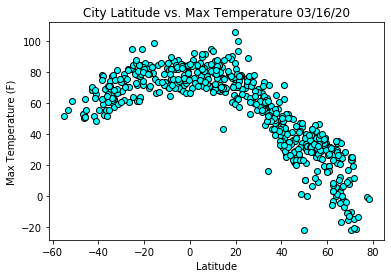

In [10]:
plt.scatter(df['Lat'], df['Max Temp'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
str_date = datetime.utcfromtimestamp(df.loc[0, 'Date']).strftime('%m/%d/%y')
plt.title(f'City Latitude vs. Max Temperature {str_date}')

plt.savefig('scatter1.png')
plt.show()

The graph is a bit skewed because there are more northern hemisphere data points than southern hemisphere, but you can clearly see a pattern that as you move further away from 0 Latitude (equator), the Max Temp begins to drop.

#### Latitude vs. Humidity Plot

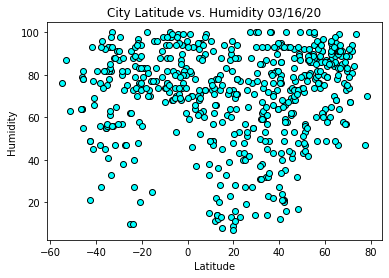

In [11]:
plt.scatter(df['Lat'], df['Humidity'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs. Humidity {str_date}')

plt.savefig('scatter2.png')
plt.show()

This graph shows that there is no real relationship between Latitude and Humidity.

#### Latitude vs. Cloudiness Plot

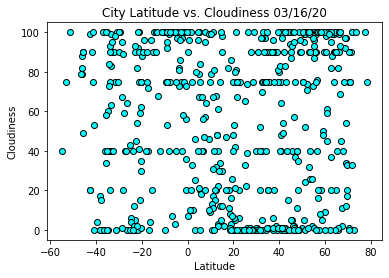

In [12]:
plt.scatter(df['Lat'], df['Cloudiness'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Cloudiness {str_date}')

plt.savefig('scatter3.png')
plt.show()

This graph shows that there is no real relationship between Latitude and Cloudiness.

#### Latitude vs. Wind Speed Plot

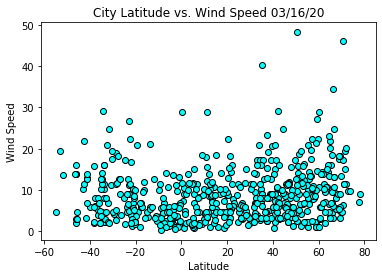

In [13]:
plt.scatter(df['Lat'], df['Wind Speed'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs. Wind Speed {str_date}')

plt.savefig('scatter4.png')
plt.show()

This graph shows that there is no real relationship between Latitude and Wind Speed.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_regress_line(x_values, y_values):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    return {rvalue, line_eq}

In [15]:
# Create Northern and Southern Hemisphere DataFrames
south_df = df[df['Lat'] < 0]
north_df = df[df['Lat'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9008457439409918


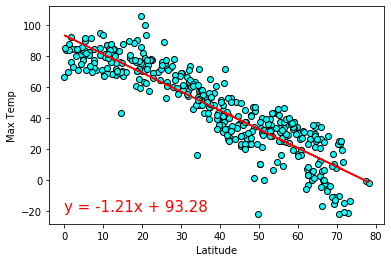

In [16]:
plt.scatter(north_df['Lat'], north_df['Max Temp'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Max Temp'])
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter5.png')
plt.show()

The linear regression shows a negative correlation between latitude and max temp. As you move further north away from 0 lat, the Max Temp moves torwards a negative value.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6183002012173668


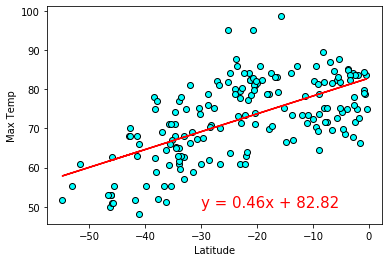

In [17]:
plt.scatter(south_df['Lat'], south_df['Max Temp'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Max Temp'])
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter6.png')
plt.show()

The linear regression shows a positive correlation between latitude and max temp for the southern hemisphere. As you move towards the equator from the furthest souther point, the max temp moves torwards higher positive values.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2798094951020427


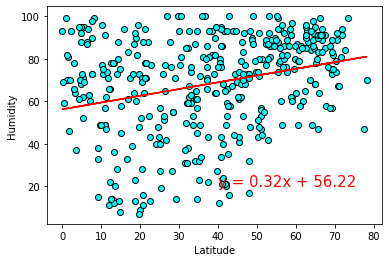

In [18]:
plt.scatter(north_df['Lat'], north_df['Humidity'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Humidity'])
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter7.png')
plt.show()

The linear regression shows little to no correlation between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2774746979397645


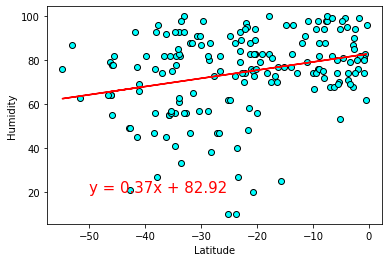

In [19]:
plt.scatter(south_df['Lat'], south_df['Humidity'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Humidity'])
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter8.png')
plt.show()

The linear regression shows little to no correlation between humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20289878268307185


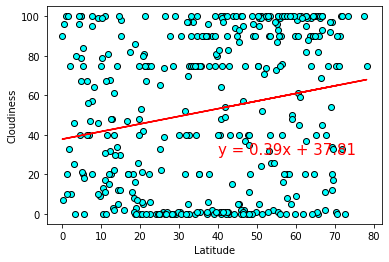

In [20]:
plt.scatter(north_df['Lat'], north_df['Cloudiness'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Cloudiness'])
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter9.png')
plt.show()

The linear regression shows almost no correlation between cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2386123798241261


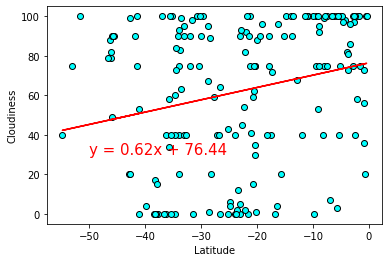

In [21]:
plt.scatter(south_df['Lat'], south_df['Cloudiness'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Cloudiness'])
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter10.png')
plt.show()

The linear regression shows almost no correlation between cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21233711742673053


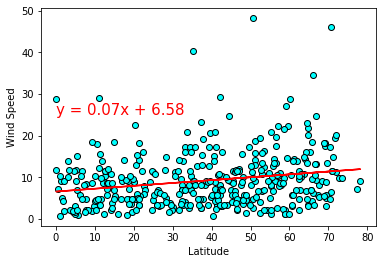

In [22]:
plt.scatter(north_df['Lat'], north_df['Wind Speed'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Wind Speed'])
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter11.png')
plt.show()

The linear regression shows almost no correlation between wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3190260315111843


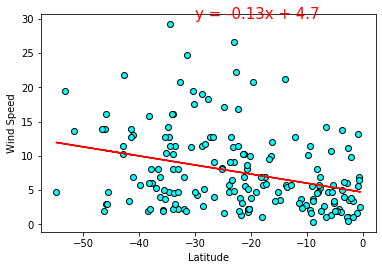

In [23]:
plt.scatter(south_df['Lat'], south_df['Wind Speed'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Wind Speed'])
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('scatter12.png')
plt.show()

The linear regression shows little to no correlation between wind speed and latitude in the southern hemisphere.

3 trends that I noticed are:
* 1) As you move further north from the equator the max temperature decreases.
* 2) As you move further north torwards the equator the max temperature increases.
* 3) Location has very little impact on cloudiness and wind speed. 